# Lista 6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

## Zadanie 1

Generujemy sztuczny zbiór danych w $\mathbb{R}^3$, w którym punkty leżą w pobliżu pewnej płaszczyzny (czyli faktyczna wymiarowość danych jest bliska $2$).

Następnie stosujemy analizę głównych składowych (PCA) z `scikit-learn`, aby zredukować wymiarowość z $3D$ do $2D$:
- dopasowujemy model `PCA(n_components=2)` do danych $3D$,
- przekształcamy dane do nowej przestrzeni $2D$ (pierwsze dwie składowe główne),
- porównujemy wizualnie dane przed i po redukcji wymiarowości.


Kształt danych 3D: (300, 3)
Kształt danych po PCA (2D): (300, 2)
Wyjaśniona wariancja (składowe): [0.57454077 0.42469013]


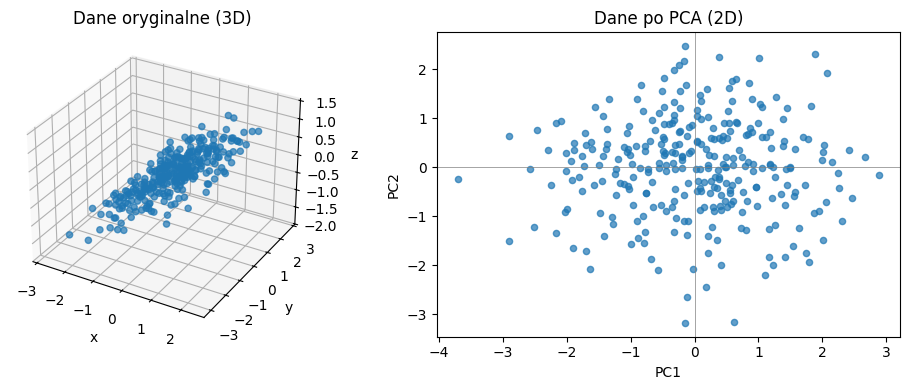

In [ ]:
np.random.seed(0)
n_samples = 300

u = np.random.randn(n_samples)
v = np.random.randn(n_samples)

# Definiujemy płaszczyznę w 3D: x = u, y = v, z ≈ 0.5*u + 0.2*v
# + mały szum
x = u
y = v
z = 0.5 * u + 0.2 * v + 0.05 * np.random.randn(n_samples)

X_3d = np.column_stack([x, y, z])

print("Kształt danych 3D:", X_3d.shape)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_3d)

print("Kształt danych po PCA (2D):", X_2d.shape)
print("Wyjaśniona wariancja (składowe):", pca.explained_variance_ratio_)


fig = plt.figure(figsize=(10, 4))

#dane 3D 
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], s=20, alpha=0.7)
ax1.set_title("Dane oryginalne (3D)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

#dane 2D
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_2d[:, 0], X_2d[:, 1], s=20, alpha=0.7)
ax2.set_title("Dane po PCA (2D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.axhline(0, color="gray", linewidth=0.5)
ax2.axvline(0, color="gray", linewidth=0.5)

plt.tight_layout()
plt.show()


## Zadanie 2

Korzystamy ze zbioru Iris (4 cechy na próbkę) i stosujemy PCA po standaryzacji danych.

Kroki:
1. Skalujemy cechy.
2. Dopasowujemy `PCA` z `n_components=4`, aby policzyć udział wariancji wyjaśnionej przez każdą składową główną.
3. Rysujemy:
   - wykres udziału wariancji wyjaśnionej przez poszczególne składowe,
   - wykres skumulowanej wariancji.
4. Na podstawie skumulowanej wariancji określamy, ile głównych składowych trzeba zachować, aby wyjaśnić co najmniej \(95\%\) całkowitej wariancji.


Kształt danych: (150, 4)
Udział wariancji wyjaśnionej: [0.72962445 0.22850762 0.03668922 0.00517871]
Skumulowana wariancja: [0.72962445 0.95813207 0.99482129 1.        ]
Liczba składowych potrzebnych do wyjaśnienia >= 95% wariancji: 2


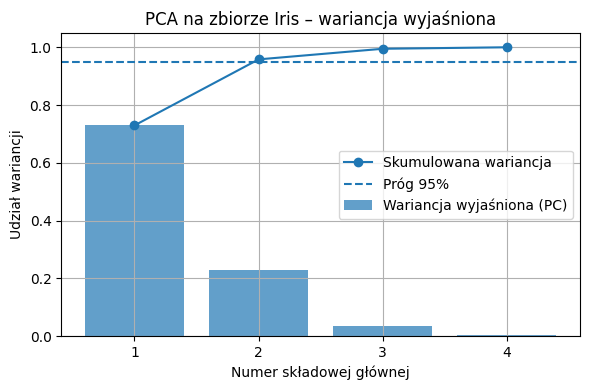

In [ ]:
data = load_iris()
X = data.data 
y = data.target

print("Kształt danych:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

expl_var = pca.explained_variance_ratio_          
cum_expl_var = np.cumsum(expl_var)               

print("Udział wariancji wyjaśnionej:", expl_var)
print("Skumulowana wariancja:", cum_expl_var)

threshold = 0.95
n_components_95 = np.argmax(cum_expl_var >= threshold) + 1
print(f"Liczba składowych potrzebnych do wyjaśnienia >= 95% wariancji: {n_components_95}")

components = np.arange(1, len(expl_var) + 1)

plt.figure(figsize=(6, 4))

plt.bar(components, expl_var, alpha=0.7, label="Wariancja wyjaśniona (PC)")

plt.plot(components, cum_expl_var, marker="o", label="Skumulowana wariancja")

plt.axhline(threshold, linestyle="--", label="Próg 95%")
plt.xticks(components)
plt.xlabel("Numer składowej głównej")
plt.ylabel("Udział wariancji")
plt.title("PCA na zbiorze Iris – wariancja wyjaśniona")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Wynika, że 2 pierwsze składowe wystarczają, żeby wyjaśnić ≥ 95% całkowitej wariancji – dlatego mówimy, że dla tego zbioru można sensownie zredukować wymiar z 4D do 2D bez dużej utraty informacji.

## Zadanie 3

Korzystamy ponownie ze zbioru danych Iris, a następnie redukujemy jego wymiarowość do 2 głównych składowych za pomocą PCA.

Kroki:
1. Standaryzacja cech 
2. Dopasowanie PCA z `n_components=2` i przekształcenie danych do przestrzeni $2D$.
3. Wykres punktowy w przestrzeni dwóch pierwszych składowych, z kolorami odpowiadającymi klasom gatunków.

Kształt danych: (150, 4)
Kształt po PCA: (150, 2)
Udział wariancji wyjaśnionej: [0.72962445 0.22850762]
Skumulowana wariancja: [0.72962445 0.95813207]


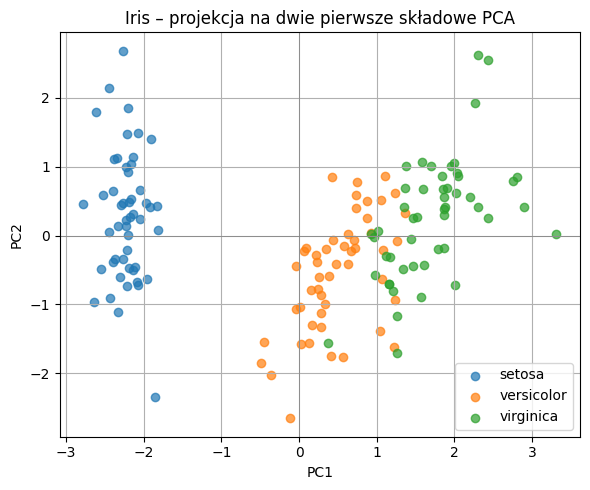

In [ ]:
data = load_iris()
X = data.data     
y = data.target    
target_names = data.target_names

print("Kształt danych:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Kształt po PCA:", X_pca.shape)
print("Udział wariancji wyjaśnionej:", pca.explained_variance_ratio_)
print("Skumulowana wariancja:", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(6, 5))

for class_idx, class_name in enumerate(target_names):
    mask = (y == class_idx)
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=class_name,
        alpha=0.7
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris – projekcja na dwie pierwsze składowe PCA")
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Dwie pierwsze składowe PCA wyjaśniają ok. $95{,}8\%$ całkowitej wariancji danych, więc rzut do 2D zachowuje prawie całą informację z oryginalnych 4 cech.
- Klasa *setosa* jest w tej przestrzeni bardzo dobrze oddzielona od pozostałych – tworzy wyraźny, osobny klaster.
- Klasy *versicolor* i *virginica* częściowo nachodzą na siebie, ale widać między nimi pewną separację (różne „chmury” punktów).
- PCA jest więc w tym przypadku **skuteczną metodą wizualizacji**: pozwala w 2D zobaczyć strukturę danych i częściowe rozdzielenie klas, choć nie daje idealnej separacji wszystkich trzech gatunków. 


## Zadanie 4